In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INPUT_PATH = Path('data/raw/train.csv')

In [3]:
df = pd.read_csv(INPUT_PATH)

In [4]:
df.dtypes

random_user_id             object
install_date               object
ua_network_name            object
country_code              float64
user_agent                 object
revenue_30d_total         float64
revenue_24h_total         float64
revenue_24h_banner        float64
revenue_24h_inters        float64
revenue_24h_rewards       float64
ad_views_24h_total          int64
ad_views_24h_banner         int64
ad_views_24h_inters         int64
ad_views_24h_rewards        int64
sessions_24h                int64
conversion_duration         int64
language                   object
api_level                 float64
device_price                int64
device_ram                  int64
cpu_cores                   int64
screen_inches_diagonal    float64
screen_pixels_width         int64
screen_pixels_height        int64
dtype: object

В начале были просмотрены уникальные значения категориальных колонок.

In [5]:
df['country_code'].unique()

array([nan])

In [6]:
df['ua_network_name'].unique()

array(['UA'], dtype=object)

In [7]:
df['language'].unique()

array(['ro', 'en', 'ko', 'ru', 'id', 'ar', 'sv', 'pt', 'nb', 'ms', 'nl',
       'zh', 'fr', 'tr', 'pl', 'de', 'es', 'hu', 'th', nan, 'he', 'sr',
       'it', 'uk', 'vi', 'lt', 'km', 'el', 'da', 'cs', 'fi', 'et', 'ja',
       'sk', 'az', 'fa', 'sl', 'hi', 'uz', 'gu', 'bg', 'hr', 'bs', 'sq',
       'kk', 'ka', 'lo', 'lv', 'my', 'hy', 'mr', 'ca', 'is', 'mk', 'ur',
       'te', 'ta', 'ml', 'bn', 'am', 'af', 'mn', 'pa', 'kn', 'gl', 'eu',
       'or', 'su', 'be', 'mt', 'jv', 'as', 'si', 'ky', 'to', 'bh', 'ne',
       'sw', 'so', 'tk', 'ku', 'ga', 'ha', 'tg'], dtype=object)

ua_network_name и country_code бесполезны в дальнейшем анализе так как не имеют значений или имеют константное значение, при обучении их можно убрать.

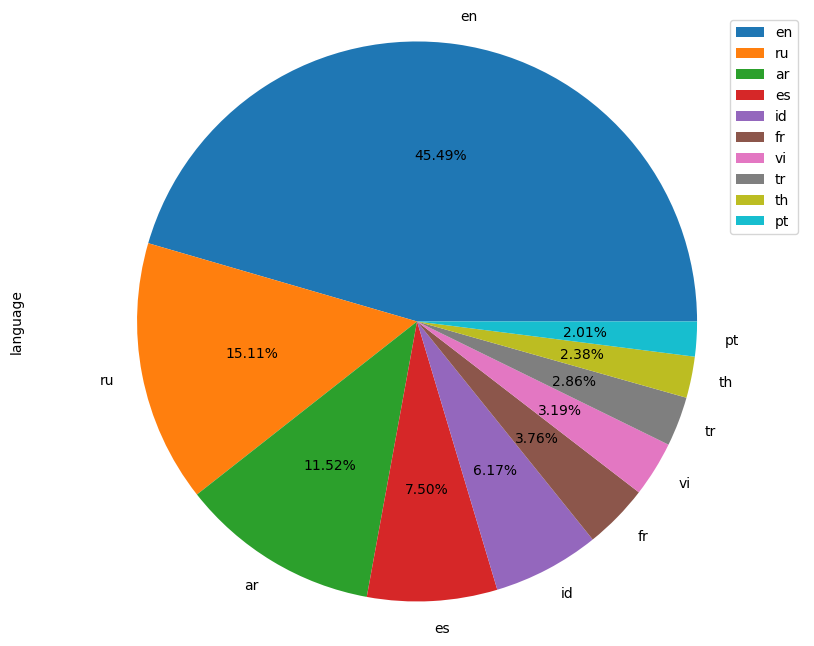

In [8]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0, 0, 0)
language = df['language'].value_counts().head(10)
language.plot(kind='pie',
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=language.index, loc="best")

Большинство пользователей рускоязычные или англоязычные

In [9]:
df.head(5)

,random_user_id,install_date,ua_network_name,country_code,user_agent,revenue_30d_total,revenue_24h_total,revenue_24h_banner,revenue_24h_inters,revenue_24h_rewards,...,sessions_24h,conversion_duration,language,api_level,device_price,device_ram,cpu_cores,screen_inches_diagonal,screen_pixels_width,screen_pixels_height
0,7fbc5f2d253daddd281176f9e3875e154becc557,2022-03-01,UA,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,ro,30.0,0,0,0,0.00,0,0
1,d68c86d585877402faa3df457e94c3ff995a2800,2022-03-01,UA,NaN,Dalvik/2.1.0 (Linux; U; Android 11; CPH2325 Bu...,0.002889,0.002889,0.000426,0.002463,0.000000,...,2,0,en,30.0,200,6144,8,6.51,720,1600
2,f24bd92150a202692715d6490809873cf1cb0bc4,2022-03-01,UA,NaN,NaN,0.087979,0.087979,0.005323,0.082656,0.000000,...,2,103,ko,29.0,0,0,0,0.00,0,0
3,58352f4b8fd1896eae8870a6bcac6e99698e00cf,2022-03-01,UA,NaN,Dalvik/2.1.0 (Linux; U; Android 11; IN2010 Bui...,0.016486,0.016486,0.000530,0.015620,0.000336,...,1,0,ru,30.0,800,12288,8,6.55,1080,2400
4,ed42dc394649a90020a223a113904978231e052c,2022-03-01,UA,NaN,Dalvik/2.1.0 (Linux; U; Android 10; M2006C3MG ...,0.102474,0.102474,0.004953,0.027542,0.069979,...,1,0,id,29.0,100,3072,8,6.53,720,1600


In [10]:
df.describe()

,country_code,revenue_30d_total,revenue_24h_total,revenue_24h_banner,revenue_24h_inters,revenue_24h_rewards,ad_views_24h_total,ad_views_24h_banner,ad_views_24h_inters,ad_views_24h_rewards,sessions_24h,conversion_duration,api_level,device_price,device_ram,cpu_cores,screen_inches_diagonal,screen_pixels_width,screen_pixels_height
count,0.0,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.009470e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06,4.125714e+06
mean,NaN,1.770131e-01,7.461250e-02,9.897300e-03,4.693986e-02,1.777534e-02,3.278635e+01,2.291962e+01,7.697078e+00,2.169650e+00,1.745852e+00,1.116839e+04,2.918629e+01,1.690401e+02,2.979667e+03,4.498232e+00,3.800859e+00,5.613345e+02,1.147015e+03
std,NaN,9.327888e-01,2.731848e-01,3.922935e-02,1.782160e-01,8.888032e-02,6.623912e+01,5.156991e+01,1.450767e+01,5.525721e+00,1.265655e+00,7.483329e+04,1.801152e+00,2.652413e+02,3.178401e+03,3.863517e+00,3.225341e+00,5.141628e+02,1.036249e+03
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,3.500777e-03,2.099384e-03,1.261275e-04,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,1.942773e-02,1.239791e-02,1.222000e-03,6.929283e-03,1.015007e-03,1.200000e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,4.500000e+01,3.000000e+01,1.000000e+02,3.072000e+03,8.000000e+00,6.000000e+00,7.200000e+02,1.520000e+03
75%,NaN,8.062470e-02,4.607115e-02,5.503434e-03,2.726520e-02,8.042310e-03,3.500000e+01,2.300000e+01,9.000000e+00,2.000000e+00,2.000000e+00,5.670000e+02,3.000000e+01,2.000000e+02,4.096000e+03,8.000000e+00,6.500000e+00,1.080000e+03,2.312000e+03
max,NaN,1.783959e+02,6.261070e+01,1.009768e+01,2.652937e+01,3.587981e+01,5.640000e+03,5.583000e+03,5.030000e+02,4.070000e+02,1.600000e+01,9.751839e+06,3.300000e+01,1.400000e+04,1.843200e+04,1.600000e+01,5.500000e+01,3.840000e+03,3.840000e+03


In [11]:
df.isnull().sum()

random_user_id                  0
install_date                    0
ua_network_name                 0
country_code              4125714
user_agent                1682411
revenue_30d_total               0
revenue_24h_total               0
revenue_24h_banner              0
revenue_24h_inters              0
revenue_24h_rewards             0
ad_views_24h_total              0
ad_views_24h_banner             0
ad_views_24h_inters             0
ad_views_24h_rewards            0
sessions_24h                    0
conversion_duration             0
language                   116330
api_level                  116244
device_price                    0
device_ram                      0
cpu_cores                       0
screen_inches_diagonal          0
screen_pixels_width             0
screen_pixels_height            0
dtype: int64

In [12]:
target_df = df.loc[df['revenue_30d_total'] > 0]
target_df = target_df.loc[df['revenue_24h_total'] > 0]
target_df = target_df.assign(log_rev_30d=np.log(target_df['revenue_30d_total']))
target_df = target_df.assign(log_rev_24h=np.log(target_df['revenue_24h_total']))

Приведем значения целевой переменной и revenue за 24 часа к логарифмической шкале для того, чтобы привести распределения этих величин к более нормальному виду

<Axes: xlabel='log_rev_30d', ylabel='Count'>

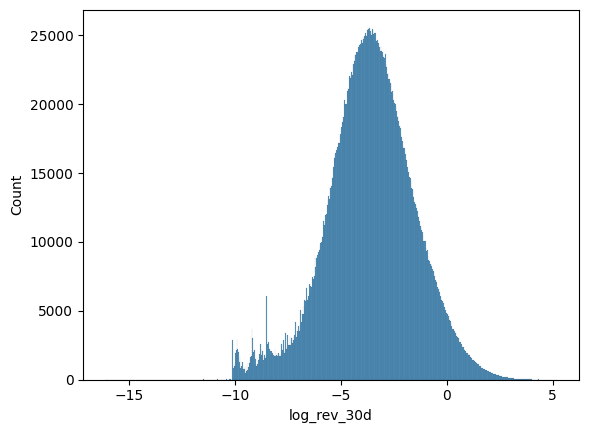

In [13]:
sns.histplot(target_df, x='log_rev_30d')

<Axes: xlabel='log_rev_24h', ylabel='Count'>

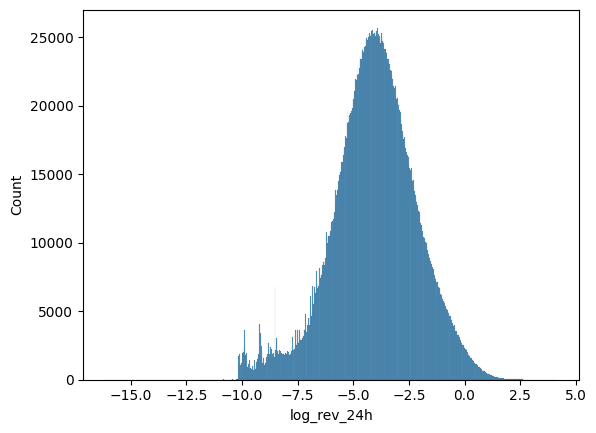

In [14]:
sns.histplot(target_df, x='log_rev_24h')

По распределениям можно наблюдать, что существует большое количество переменных в первом квартиле, что не дает нам считать распределение полностью нормальным

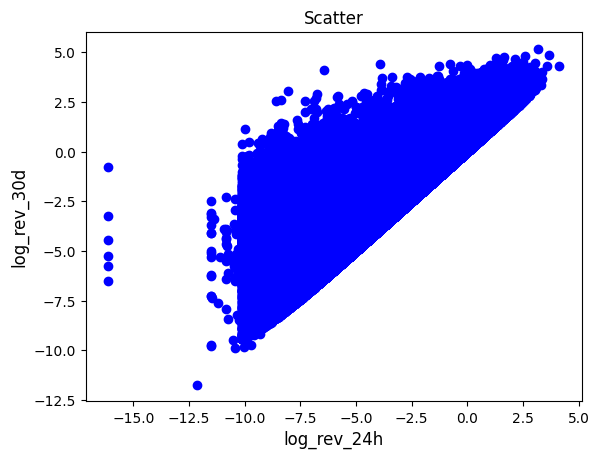

In [15]:
scat_df = target_df.loc[target_df['log_rev_30d'] > target_df['log_rev_24h']]
plt.scatter(x=scat_df['log_rev_24h'], y=scat_df['log_rev_30d'], marker='o', color='b')
plt.xlabel('log_rev_24h', fontsize=12)
plt.ylabel('log_rev_30d', fontsize=12)
plt.title('Scatter')
plt.show()

In [16]:
import statsmodels.api as sm
Y = target_df['log_rev_30d']
X = sm.add_constant(target_df['log_rev_24h'])
model = sm.OLS(Y,X)
results = model.fit()

In [17]:
results.params

const          0.426147
log_rev_24h    0.993024
dtype: float64

In [18]:
results.t_test([1, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4261      0.001    408.051      0.000       0.424       0.428

In [19]:
results.t_test([0, 1])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9930      0.000   4270.249      0.000       0.993       0.993

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_rev_30d   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.824e+07
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:22:51   Log-Likelihood:            -4.3421e+06
No. Observations:             3510271   AIC:                         8.684e+06
Df Residuals:                 3510269   BIC:                         8.684e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4261      0.001    408.051      

In [21]:
results.f_test(np.identity(2))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=42002768.474256754, p=0.0, df_denom=3.51e+06, df_num=2>

Судя по распределениям и тестам, целевая переменная имеет компоненту линейной зависимости от revenue за 24 часа

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
median_rev = [target_df['log_rev_24h'].median()] * len(target_df['log_rev_30d'])
print('Median baseline: ', mean_absolute_error(target_df['log_rev_30d'], median_rev))
print('Log baseline: ', mean_absolute_error(target_df['log_rev_30d'], results.params[0] + results.params[1] * target_df['log_rev_24h']))

Median baseline:  1.645636346964071
Log baseline:  0.5876157353306753


In [23]:
print('Median baseline: ', mean_squared_error(target_df['log_rev_30d'], median_rev, squared=False))
print('Log baseline: ', mean_squared_error(target_df['log_rev_30d'], results.params[0] + results.params[1] * target_df['log_rev_24h'], squared=False))

Median baseline:  2.1142813133268805
Log baseline:  0.8336379477676753


In [24]:
print('Median baseline: ', mean_absolute_error(target_df['revenue_30d_total'], np.exp(median_rev)))
print('Log baseline: ', mean_absolute_error(target_df['revenue_30d_total'], np.exp(results.params[0] + results.params[1] * target_df['log_rev_24h'])))

Median baseline:  0.196647910412385
Log baseline:  0.11905523180445331


In [25]:
print('Mean baseline: ', mean_squared_error(target_df['revenue_30d_total'], np.exp(median_rev), squared=False))
print('Log baseline: ', mean_squared_error(target_df['revenue_30d_total'], np.exp(results.params[0] + results.params[1] * target_df['log_rev_24h']), squared=False))

Mean baseline:  1.0202392011552481
Log baseline:  0.7925733884167444


Исходя из показания метрик, можно взять линейную регрессию за бейзлайн для последующих тестов.

Далее рассмотрим api_level как признак наиболее связанный с версией операционной системы, а следовательно и косвенно связанный с моделью телефона.

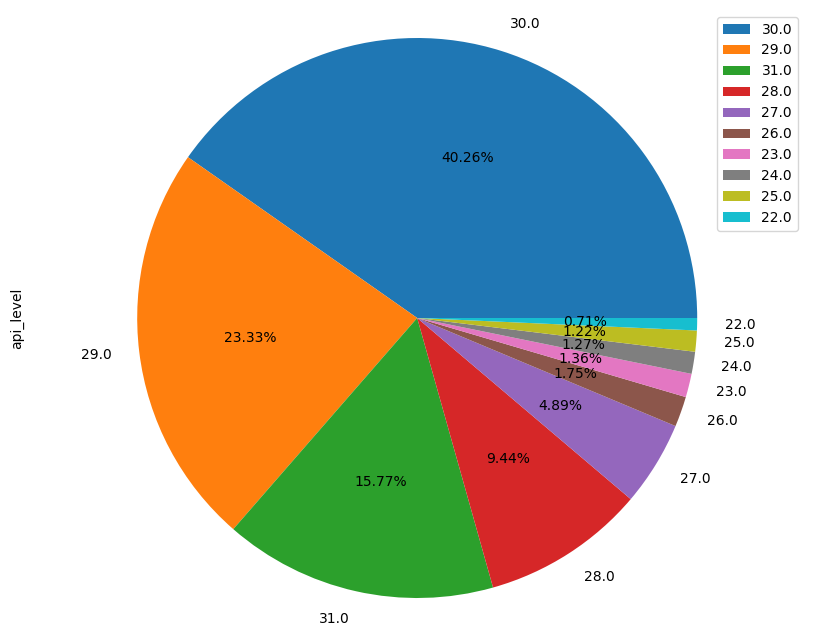

In [26]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0, 0, 0)
api_level = df['api_level'].value_counts().head(10)
api_level.plot(kind='pie',
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=api_level.index, loc="best")

Большинство пользователей используют последние версии операциоонной системы

<Axes: xlabel='log_rev_30d', ylabel='Count'>

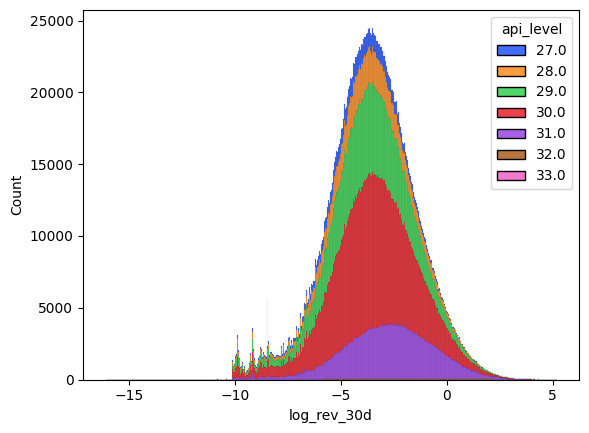

In [27]:
sns.histplot(target_df.loc[target_df['api_level'] >= 27], x='log_rev_30d', hue='api_level', palette="bright", multiple='stack')

<Axes: xlabel='log_rev_24h', ylabel='Count'>

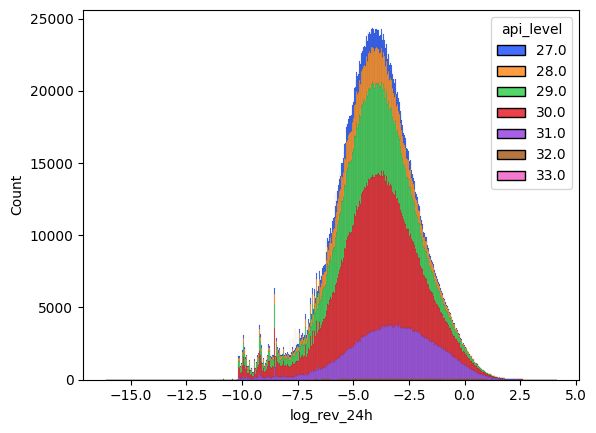

In [28]:
sns.histplot(target_df.loc[target_df['api_level'] >= 27], x='log_rev_24h', hue='api_level', palette="bright", multiple='stack')

Различие средних и дисперсии в распределениях целевой переменной по операционным системам также остаются похожими с распределениями revenue в первые сутки

Text(0.5, 0, 'Api level')

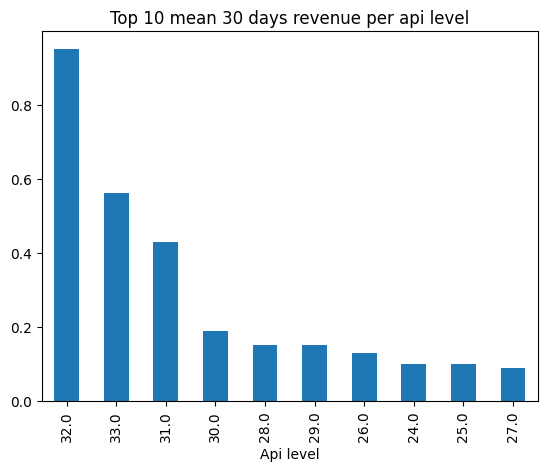

In [29]:
mean_rev = target_df.groupby('api_level')['revenue_30d_total'].mean().round(2).sort_values(ascending=False).head(10)
mean_rev.plot(kind='bar')
plt.title('Top 10 mean 30 days revenue per api level')
plt.xlabel('Api level')

Text(0.5, 0, 'Api level')

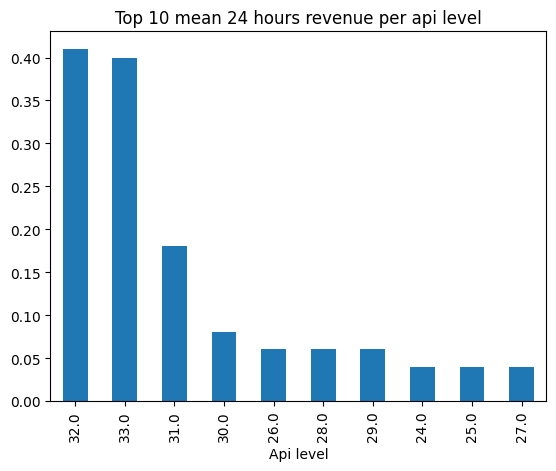

In [30]:
mean_rev = target_df.groupby('api_level')['revenue_24h_total'].mean().round(2).sort_values(ascending=False).head(10)
mean_rev.plot(kind='bar')
plt.title('Top 10 mean 24 hours revenue per api level')
plt.xlabel('Api level')

В целом, чем новее операционная система пользователя, тем больше revenue он принесет

Далее происследуем зависимость целевой переменной от даты установки приложения

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


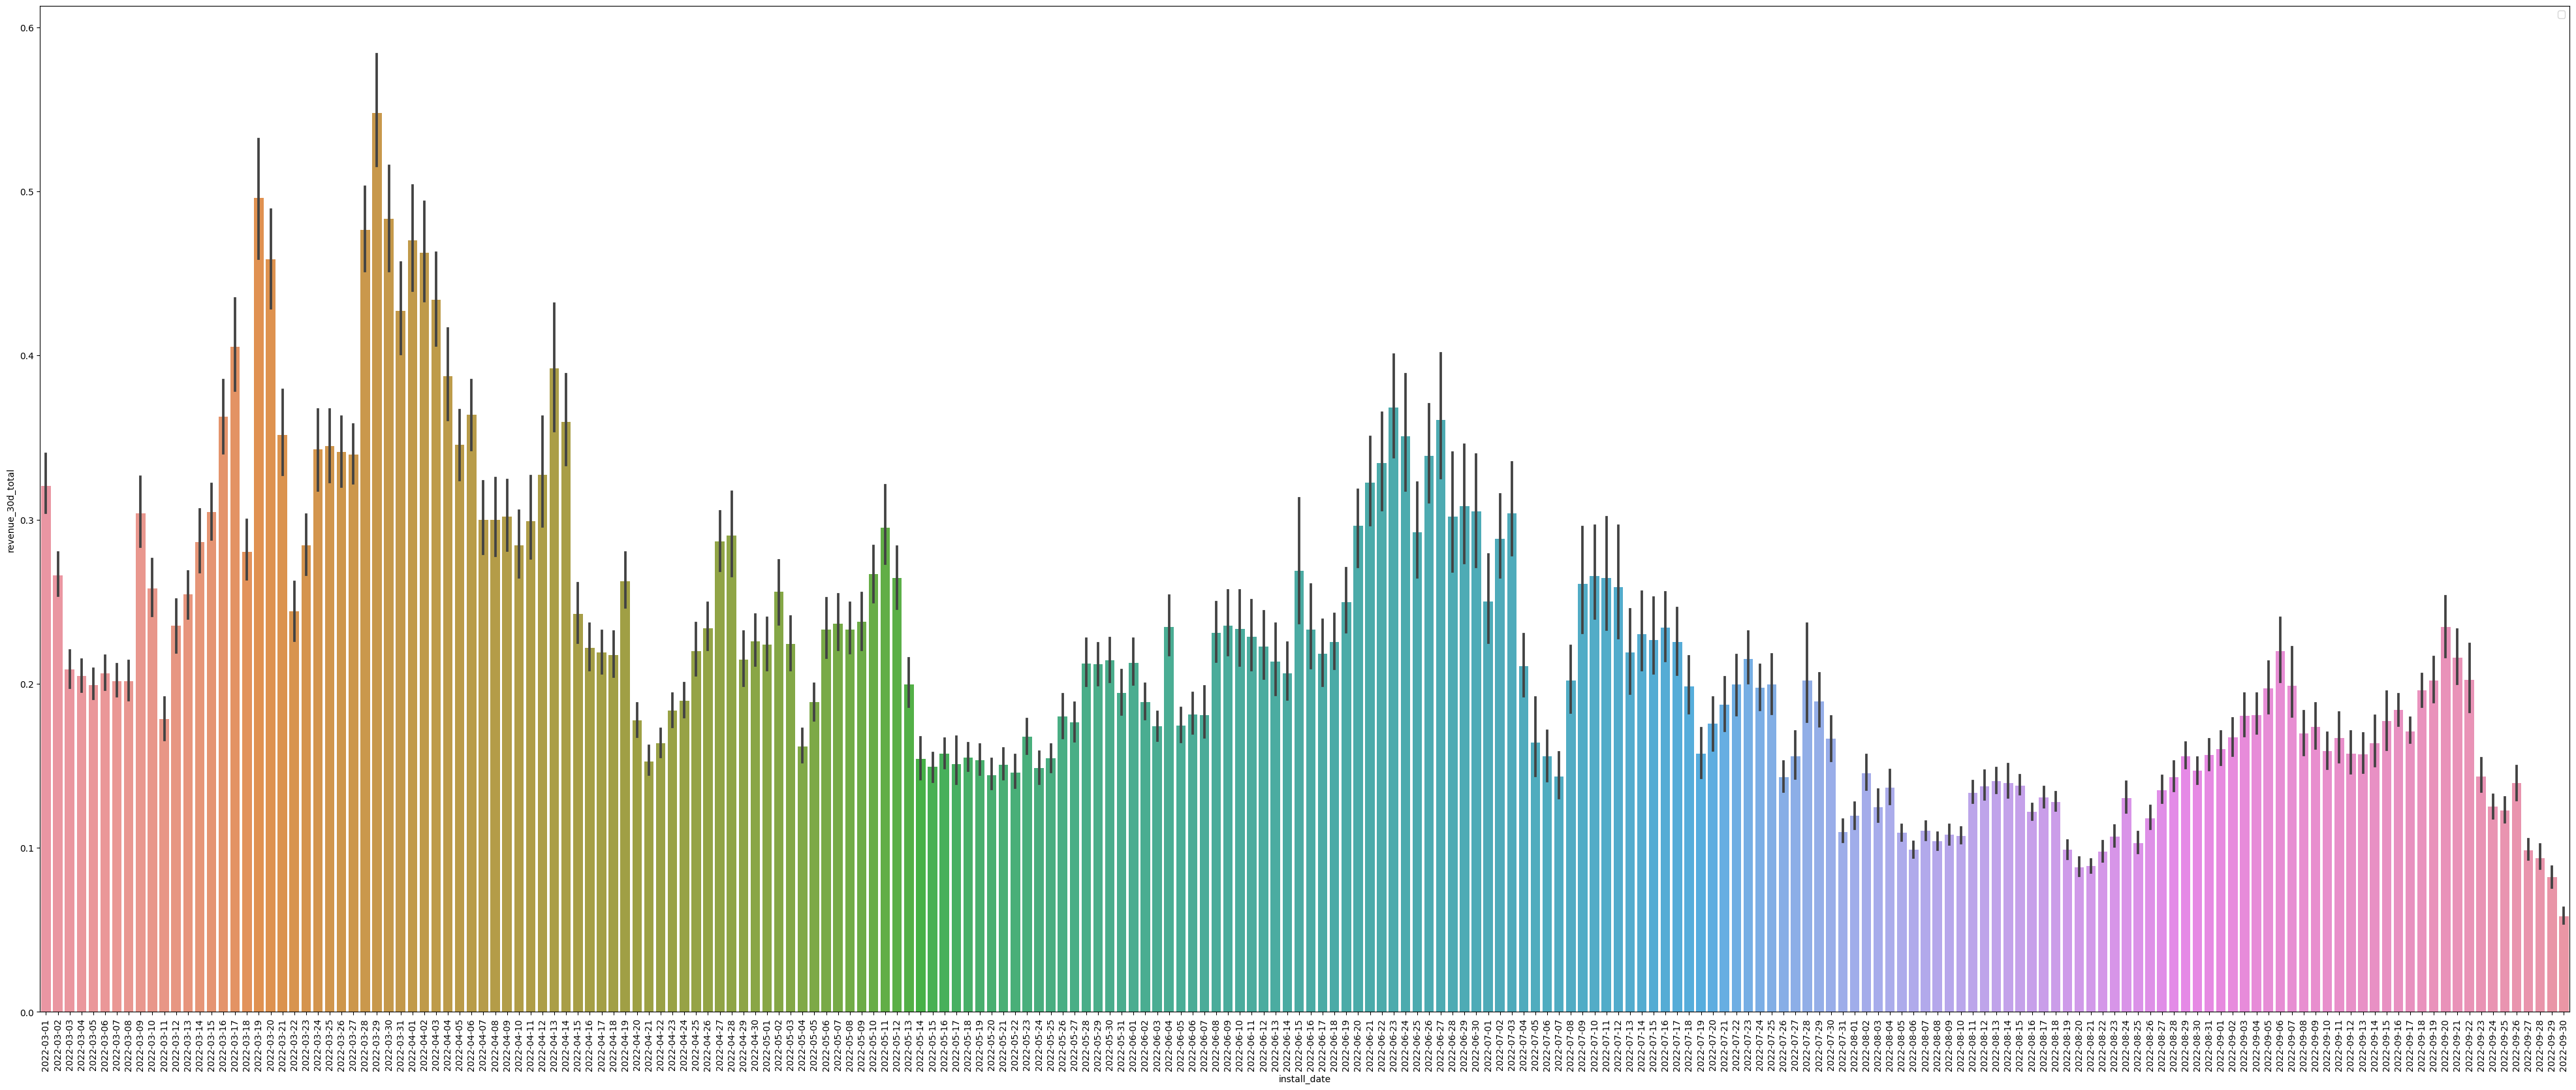

In [31]:
plt.figure(figsize=(50,20))
barWidth = 0.25
result = target_df.groupby(["install_date"])['revenue_30d_total'].mean().reset_index().sort_values('install_date')
sns.barplot(x='install_date', y="revenue_30d_total", data=target_df, order=result['install_date'])
plt.xticks(rotation=90)
plt.legend()

На временной линии видны пики по месячной доходности и в целом отслеживается тренд на снижение. Интересно было бы посмотреть с чем связаны эти пики (ивенты, скидки, купленная реклама), но пока таких данных нет

In [32]:
target_df = target_df.assign(dayofweek=target_df['install_date'].astype('datetime64').dt.dayofweek)
target_df = target_df.assign(install_month_year=target_df['install_date'].astype('datetime64').dt.to_period('M'))

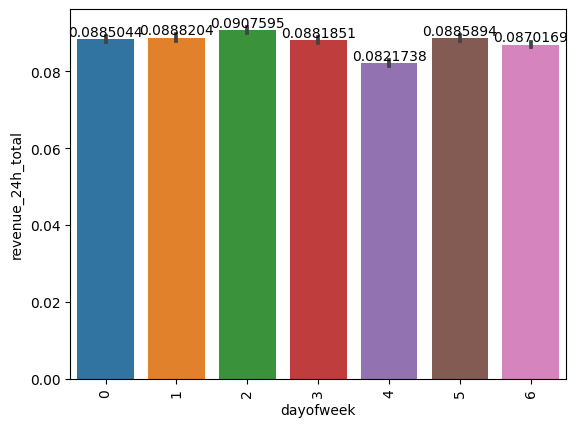

In [33]:
result = target_df.groupby(["dayofweek"])['revenue_24h_total'].mean().reset_index().sort_values('dayofweek')
ax = sns.barplot(x='dayofweek', y="revenue_24h_total", data=target_df, order=result['dayofweek'])
plt.xticks(rotation=90)
for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

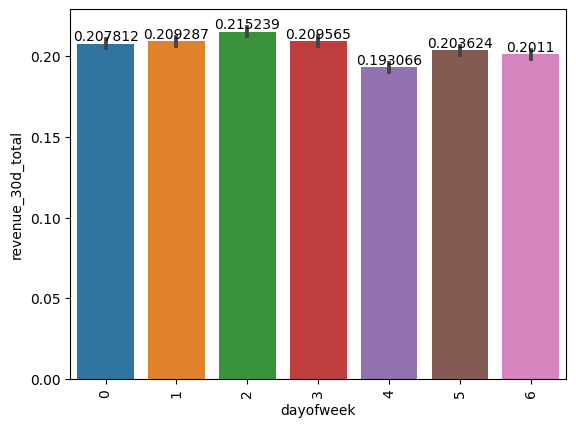

In [34]:
result = target_df.groupby(["dayofweek"])['revenue_30d_total'].mean().reset_index().sort_values('dayofweek')
ax = sns.barplot(x='dayofweek', y="revenue_30d_total", data=target_df, order=result['dayofweek'])
plt.xticks(rotation=90)
for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

Ярковыраженной зависимости дохода от дня недели не видно. Возможно имеет смысл дальше поисследовать связь дней недели с другими переменными и провести стат. тесты, но пока, можно оставить эту идею

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


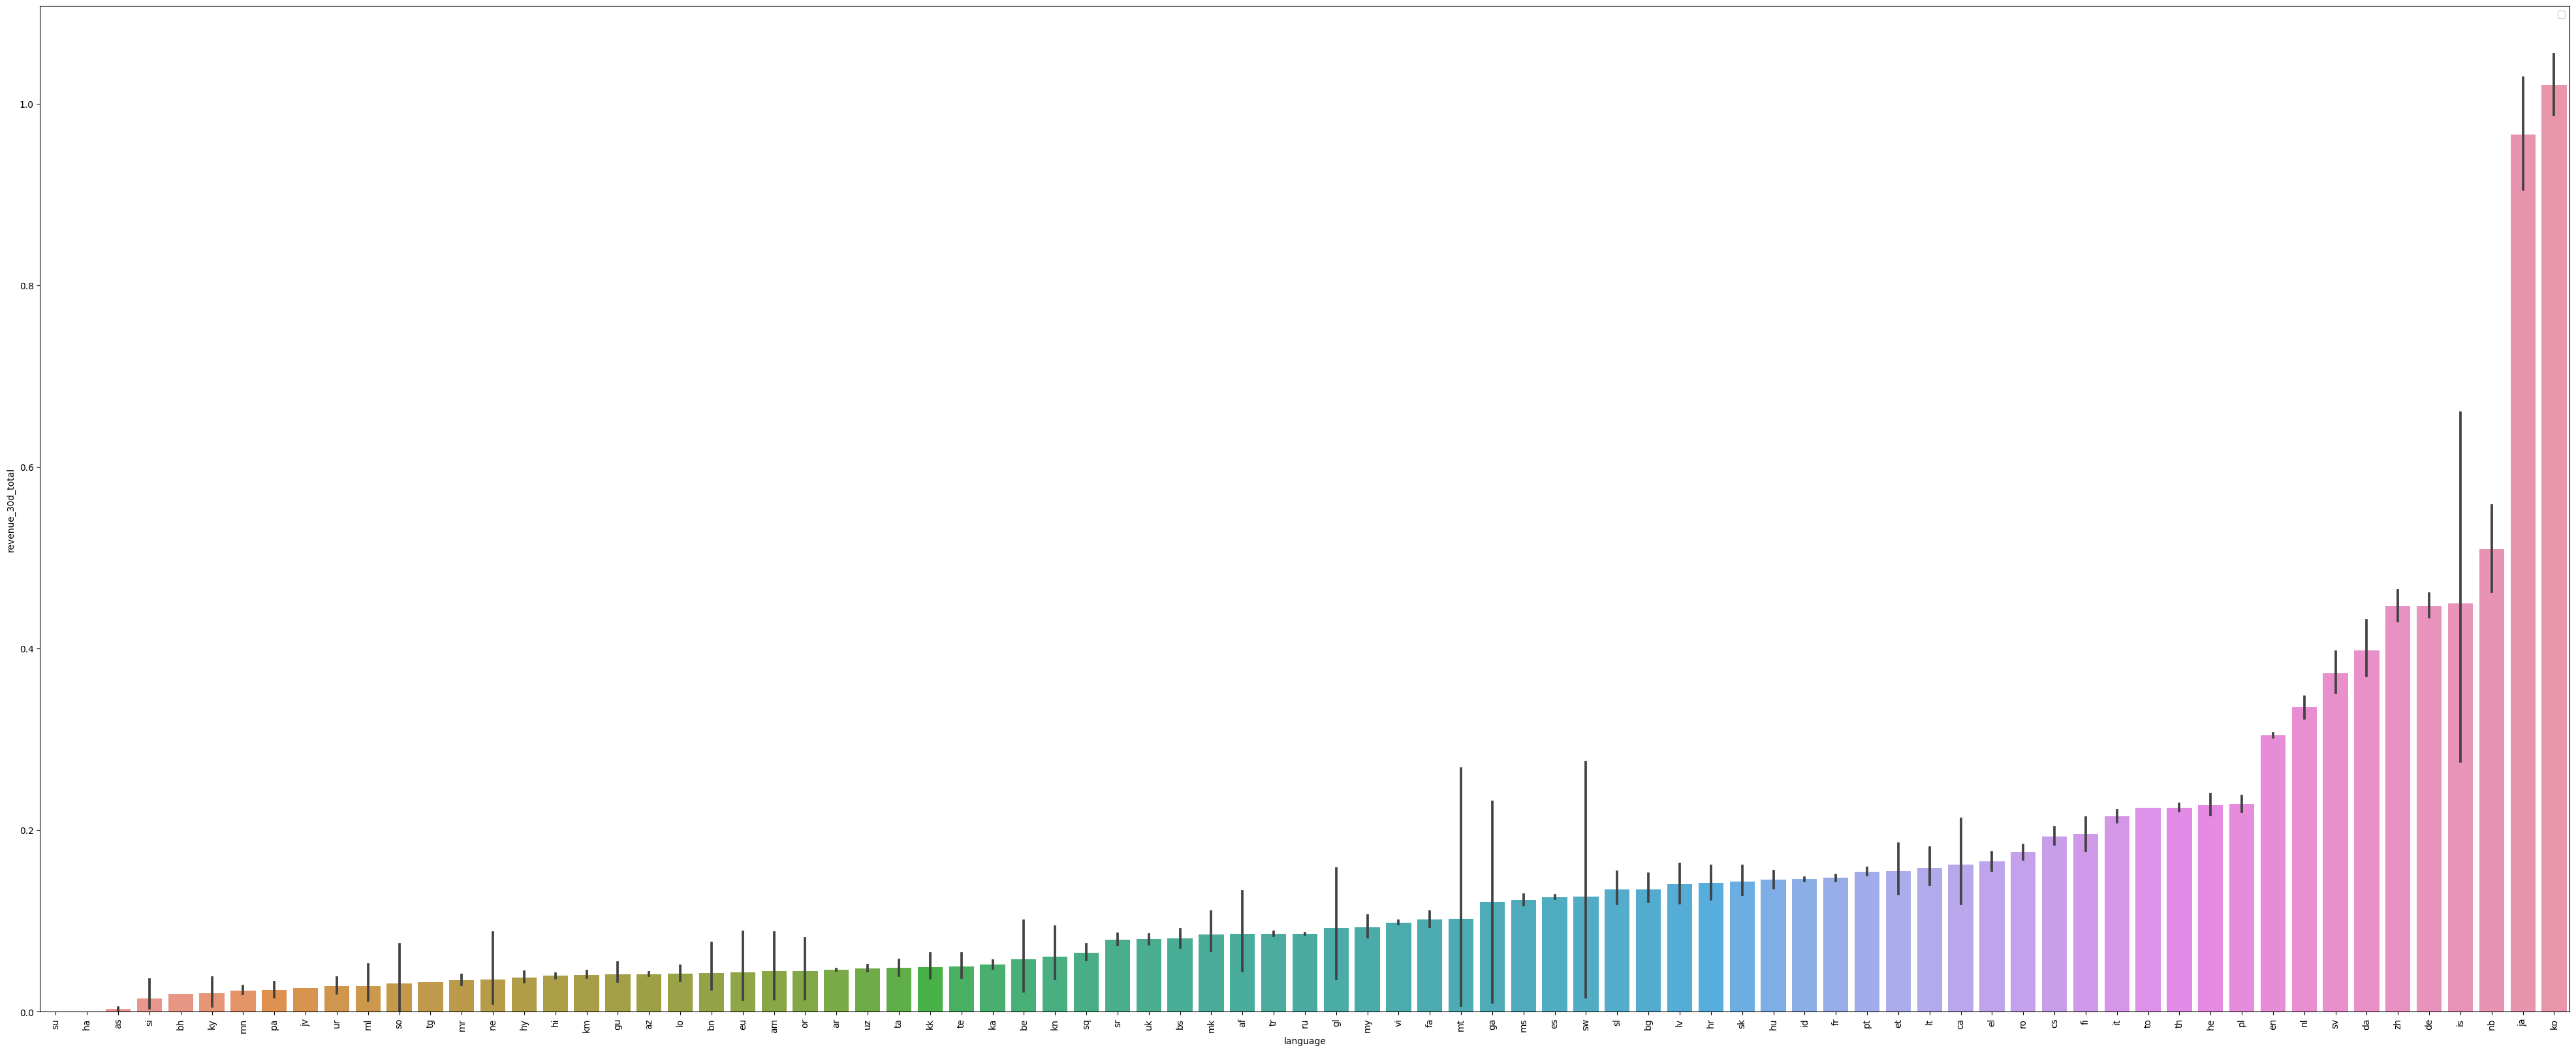

In [35]:
plt.figure(figsize=(50,20))
barWidth = 0.25
result = target_df.groupby(["language"])['revenue_30d_total'].mean().reset_index().sort_values('revenue_30d_total')
sns.barplot(x='language', y="revenue_30d_total", data=target_df, order=result['language'])
plt.xticks(rotation=90)
plt.legend()

In [36]:
result = target_df.groupby(["language"])['revenue_30d_total'].mean().reset_index().sort_values('revenue_30d_total')
result

,language,revenue_30d_total
67,su,0.000040
25,ha,0.000084
3,as,0.003322
61,si,0.014988
7,bh,0.019748
...,...,...
13,de,0.447169
32,is,0.450141
52,nb,0.509412
34,ja,0.966604


In [37]:
target_df = target_df.assign(square_area=target_df['screen_pixels_width'] * target_df['screen_pixels_height'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


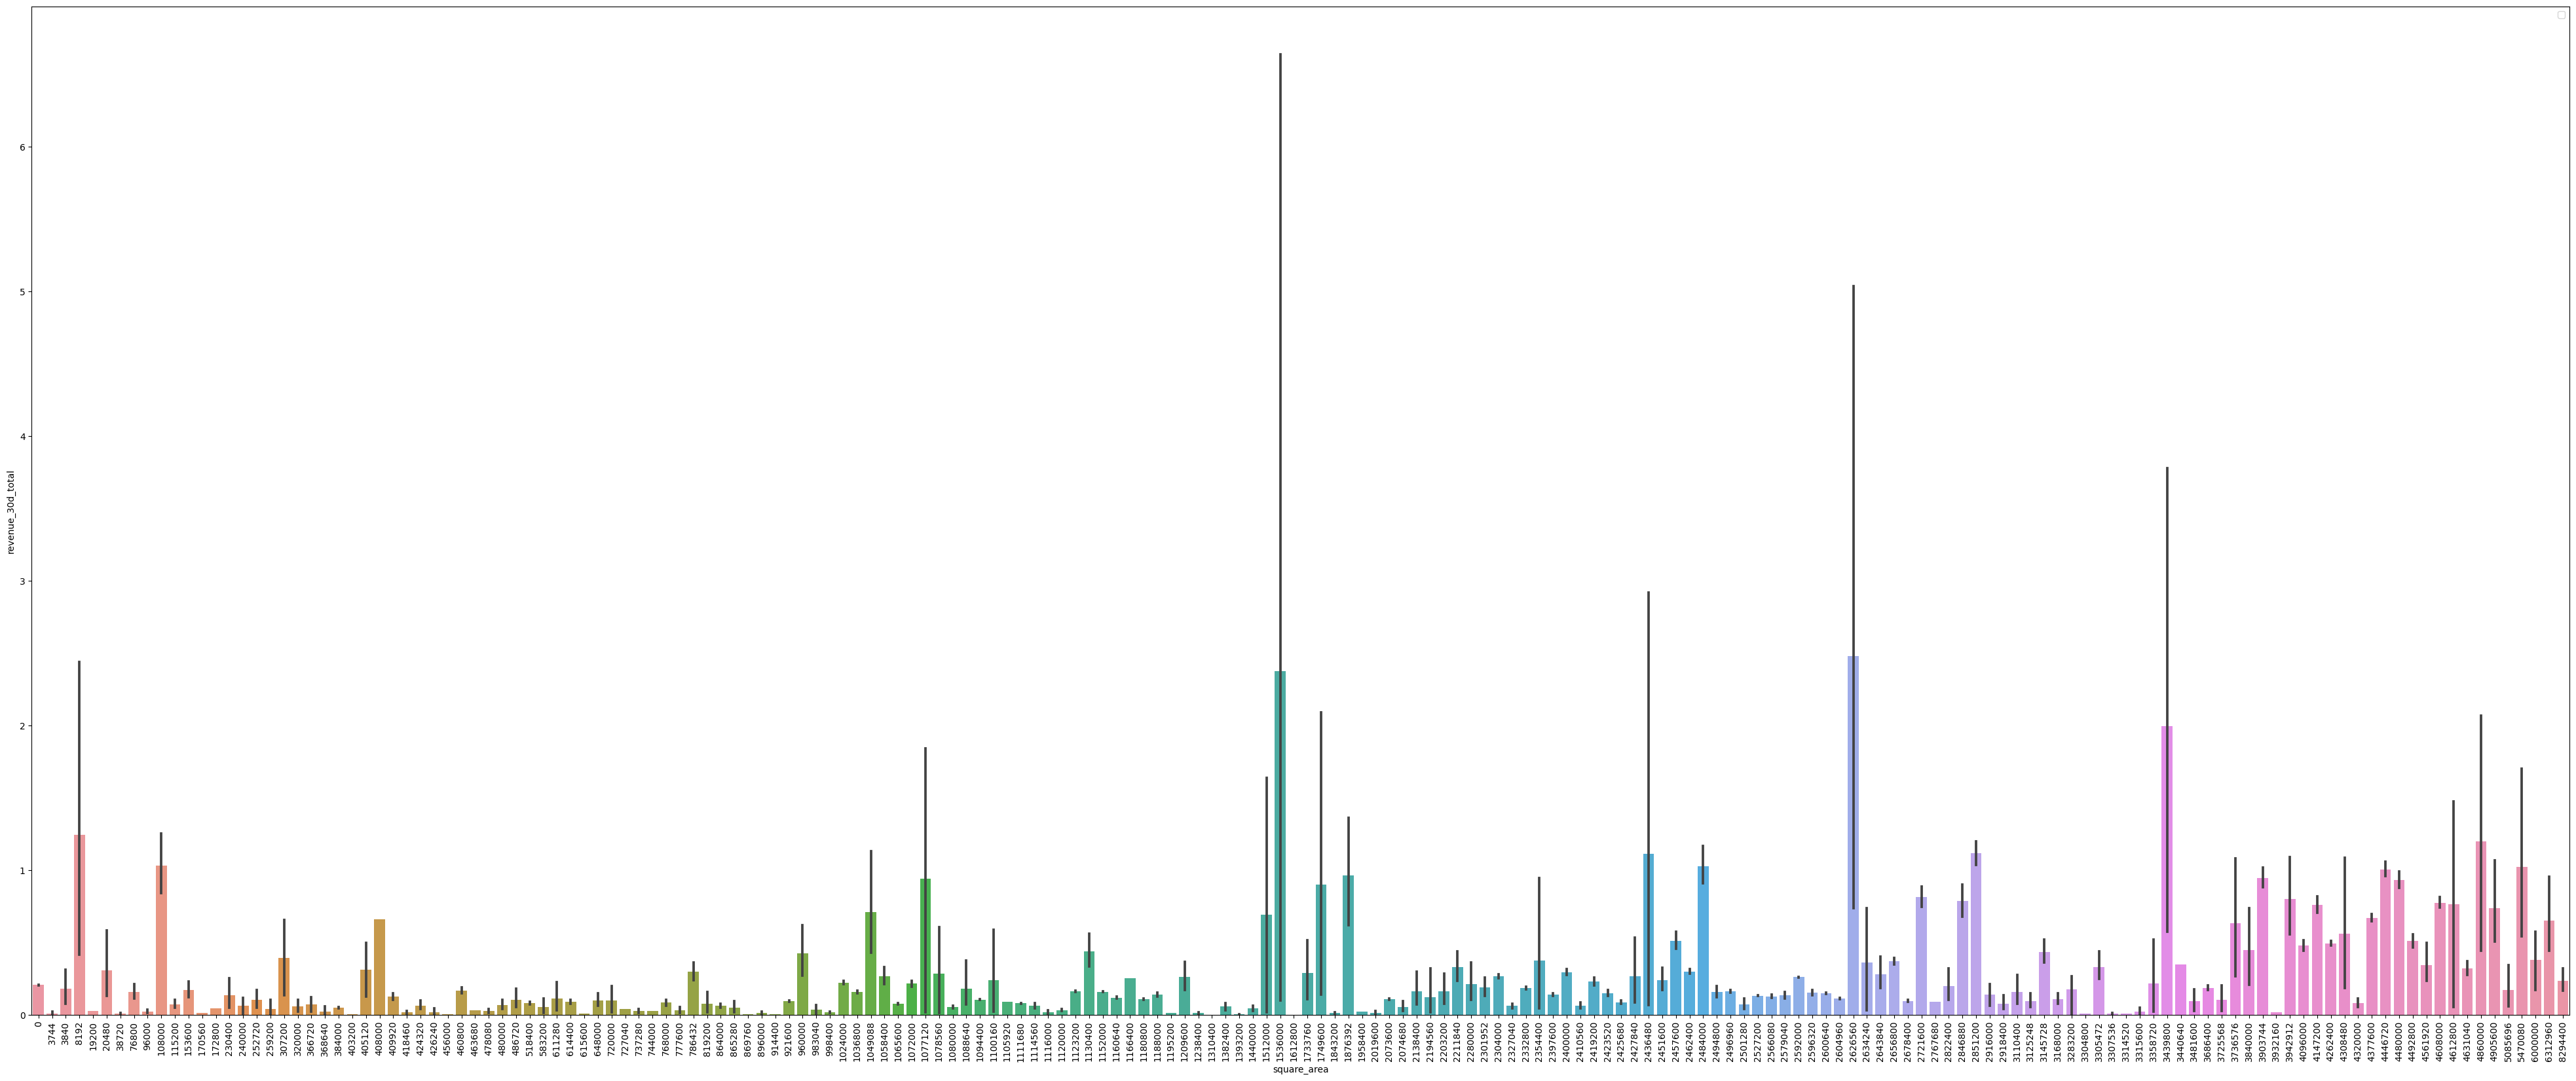

In [38]:
plt.figure(figsize=(50,20))
barWidth = 0.25
result = target_df.groupby(["square_area"])['revenue_30d_total'].mean().reset_index().sort_values('square_area')
sns.barplot(x='square_area', y="revenue_30d_total", data=target_df, order=result['square_area'])
plt.xticks(rotation=90)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


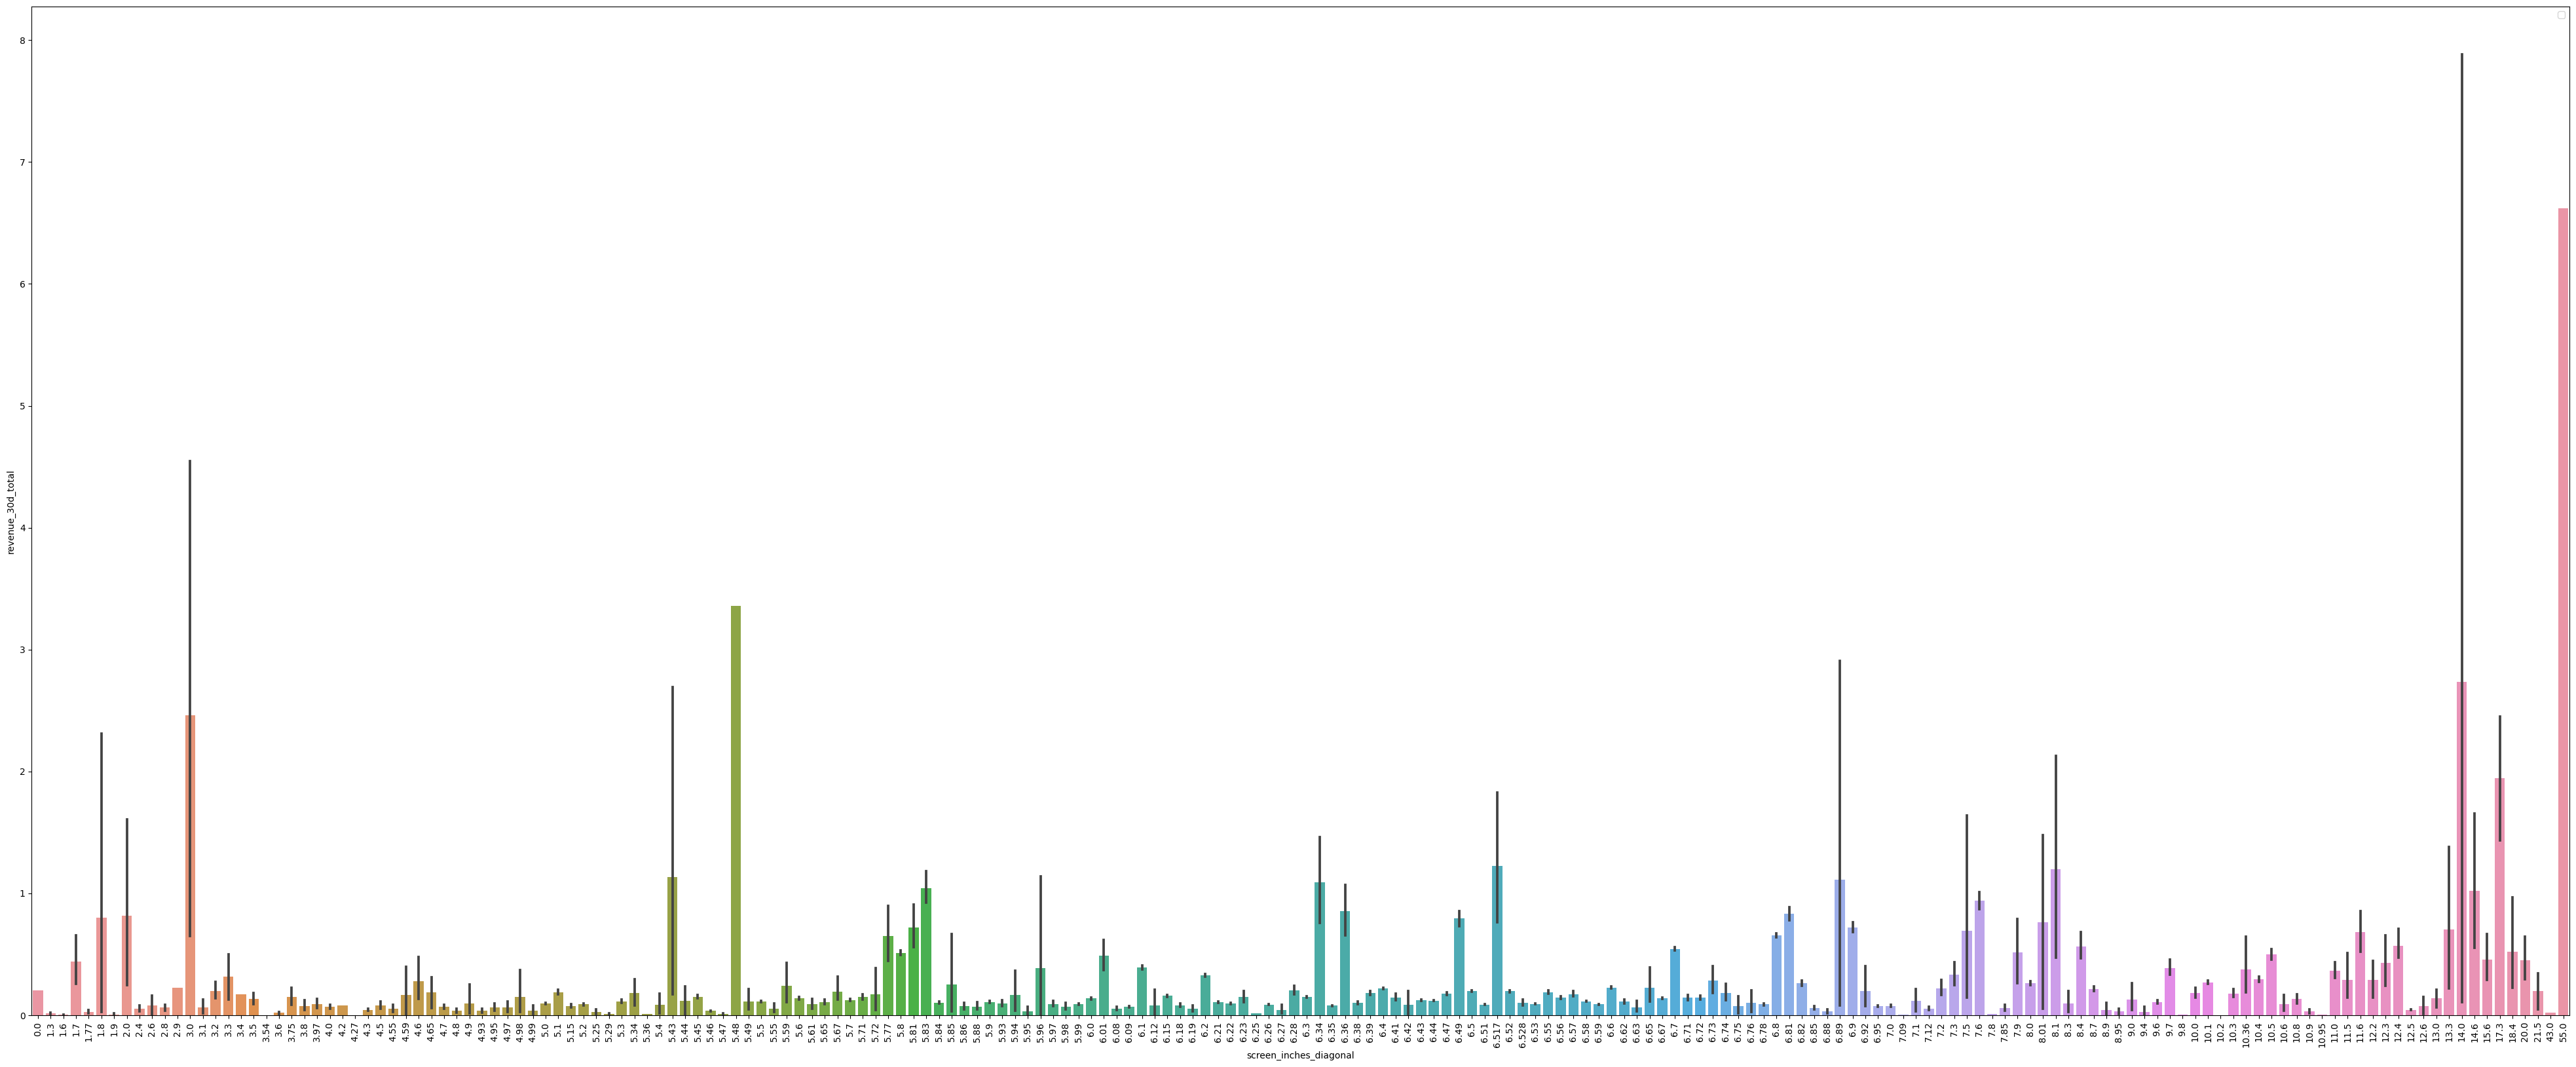

In [39]:
plt.figure(figsize=(50,20))
barWidth = 0.25
result = target_df.groupby(["screen_inches_diagonal"])['revenue_30d_total'].mean().reset_index().sort_values('screen_inches_diagonal')
sns.barplot(x='screen_inches_diagonal', y="revenue_30d_total", data=target_df, order=result['screen_inches_diagonal'])
plt.xticks(rotation=90)
plt.legend()

На данных гисторгаммах можно наблюдать среднее revenue за месяц и 24 часа в зависимости от площади экрана и диагонали. Видно, что целевая переменная имеет зависимость неизвестного характера от размера экрана телефона. Причем, что интересно гистограммы построенные по диагонали и по площади экрана отличаются обе эти переменные можно взять за входящие признаки.

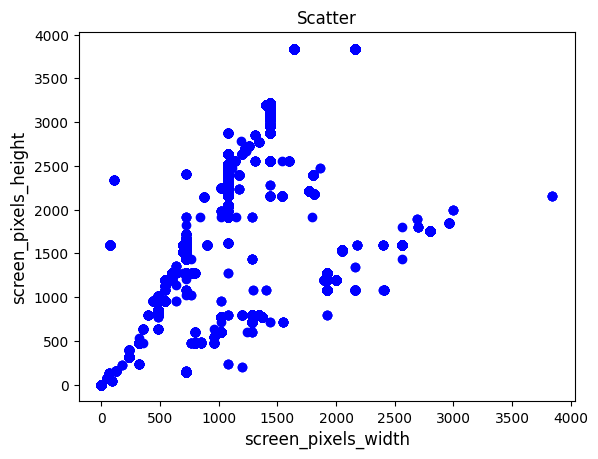

In [40]:
plt.scatter(x=target_df['screen_pixels_width'], y=target_df['screen_pixels_height'], marker='o', color='b')
plt.xlabel('screen_pixels_width', fontsize=12)
plt.ylabel('screen_pixels_height', fontsize=12)
plt.title('Scatter')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


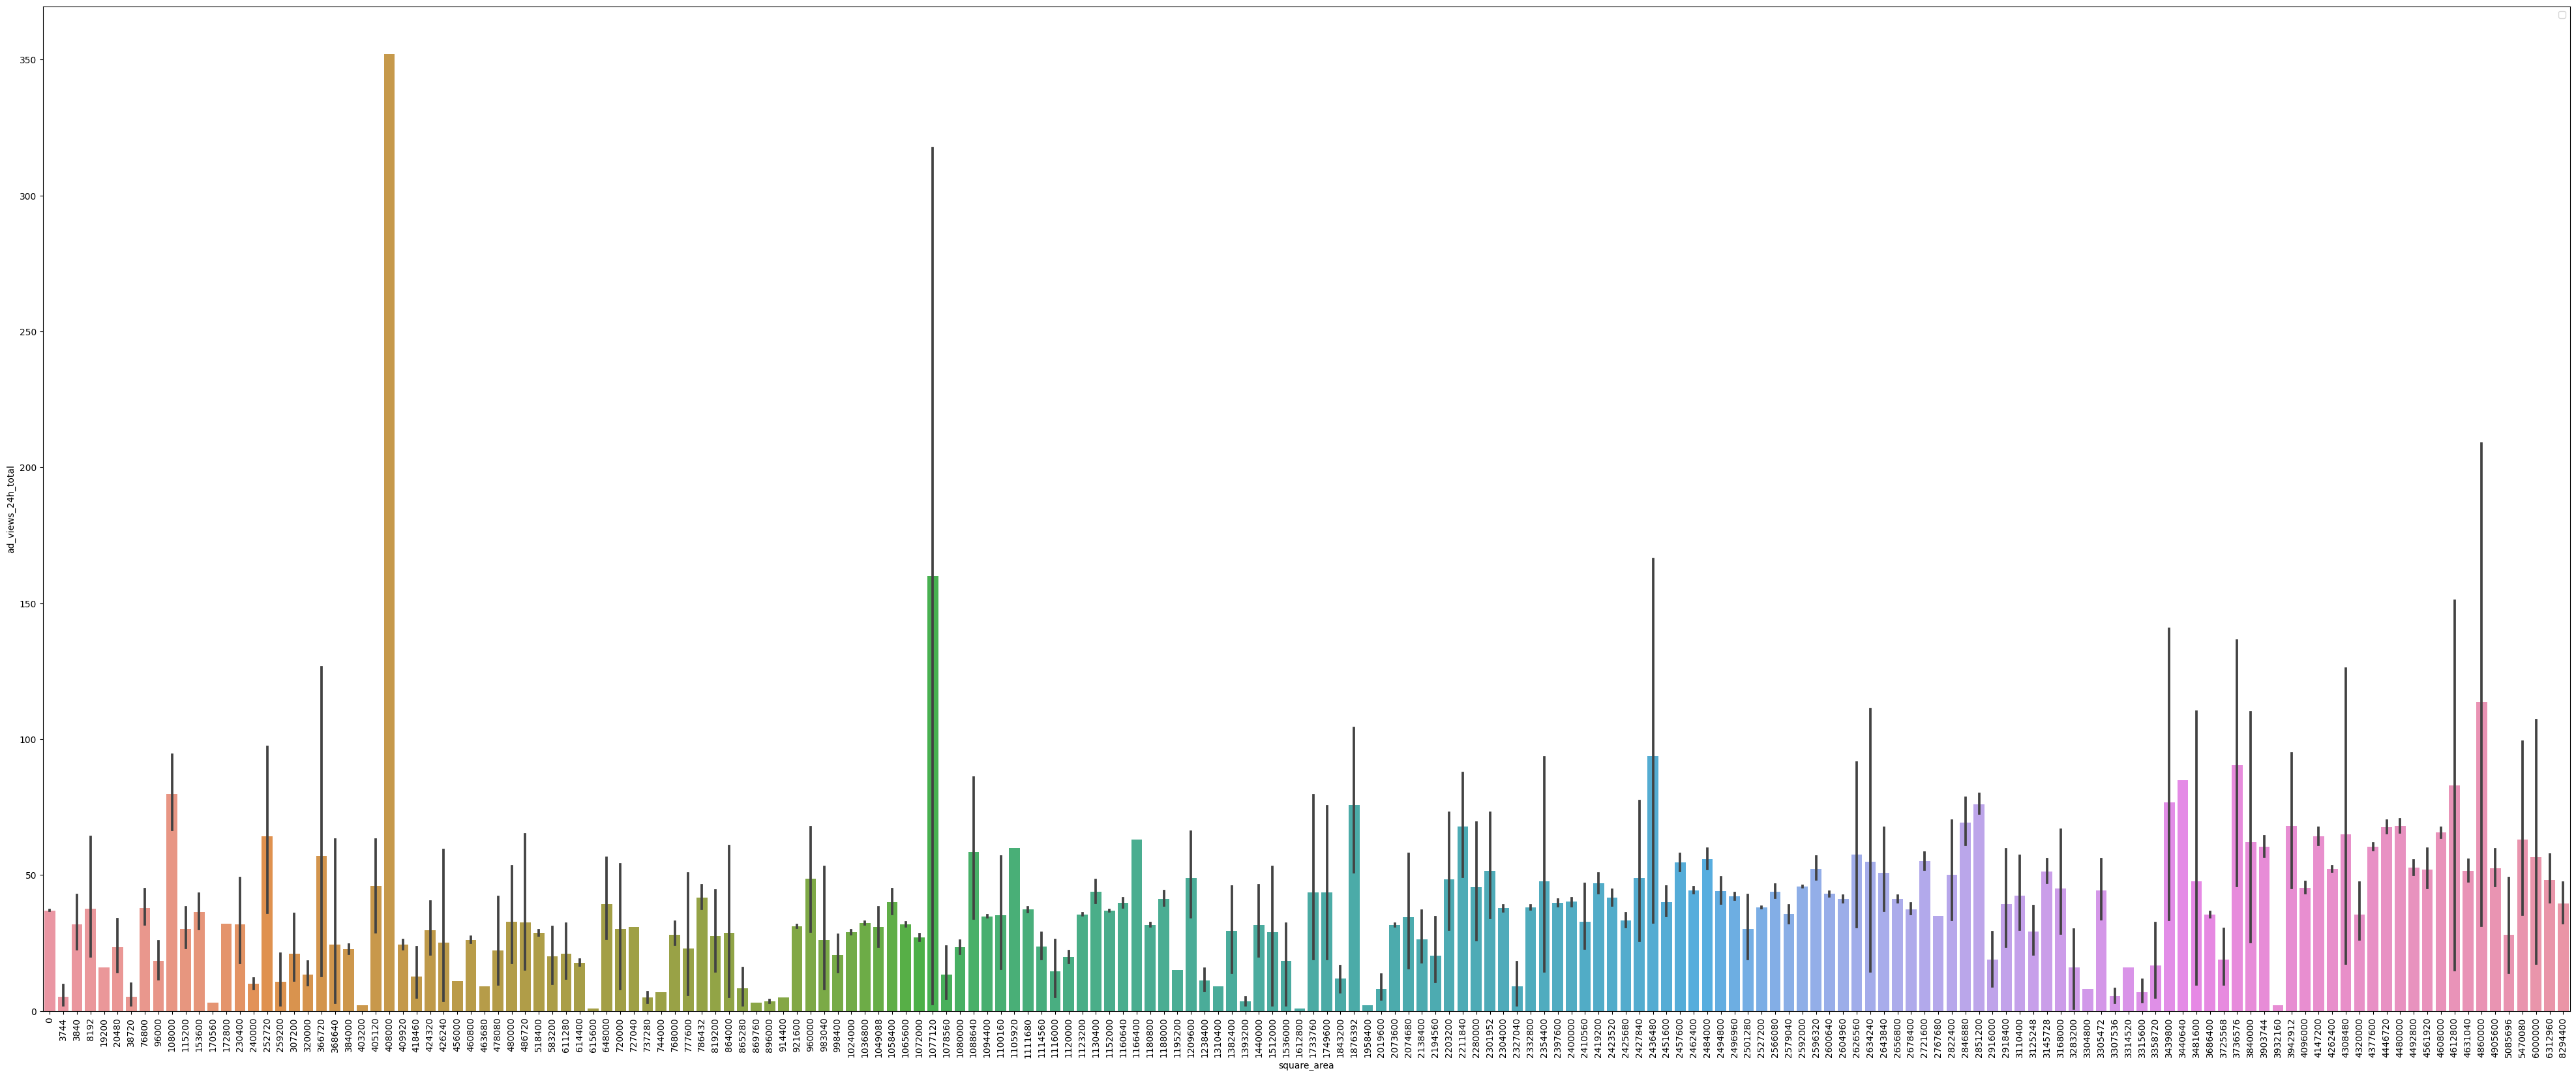

In [41]:
plt.figure(figsize=(50,20))
barWidth = 0.25
result = target_df.groupby(["square_area"])['ad_views_24h_total'].mean().reset_index().sort_values('square_area')
sns.barplot(x='square_area', y="ad_views_24h_total", data=target_df, order=result['square_area'])
plt.xticks(rotation=90)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


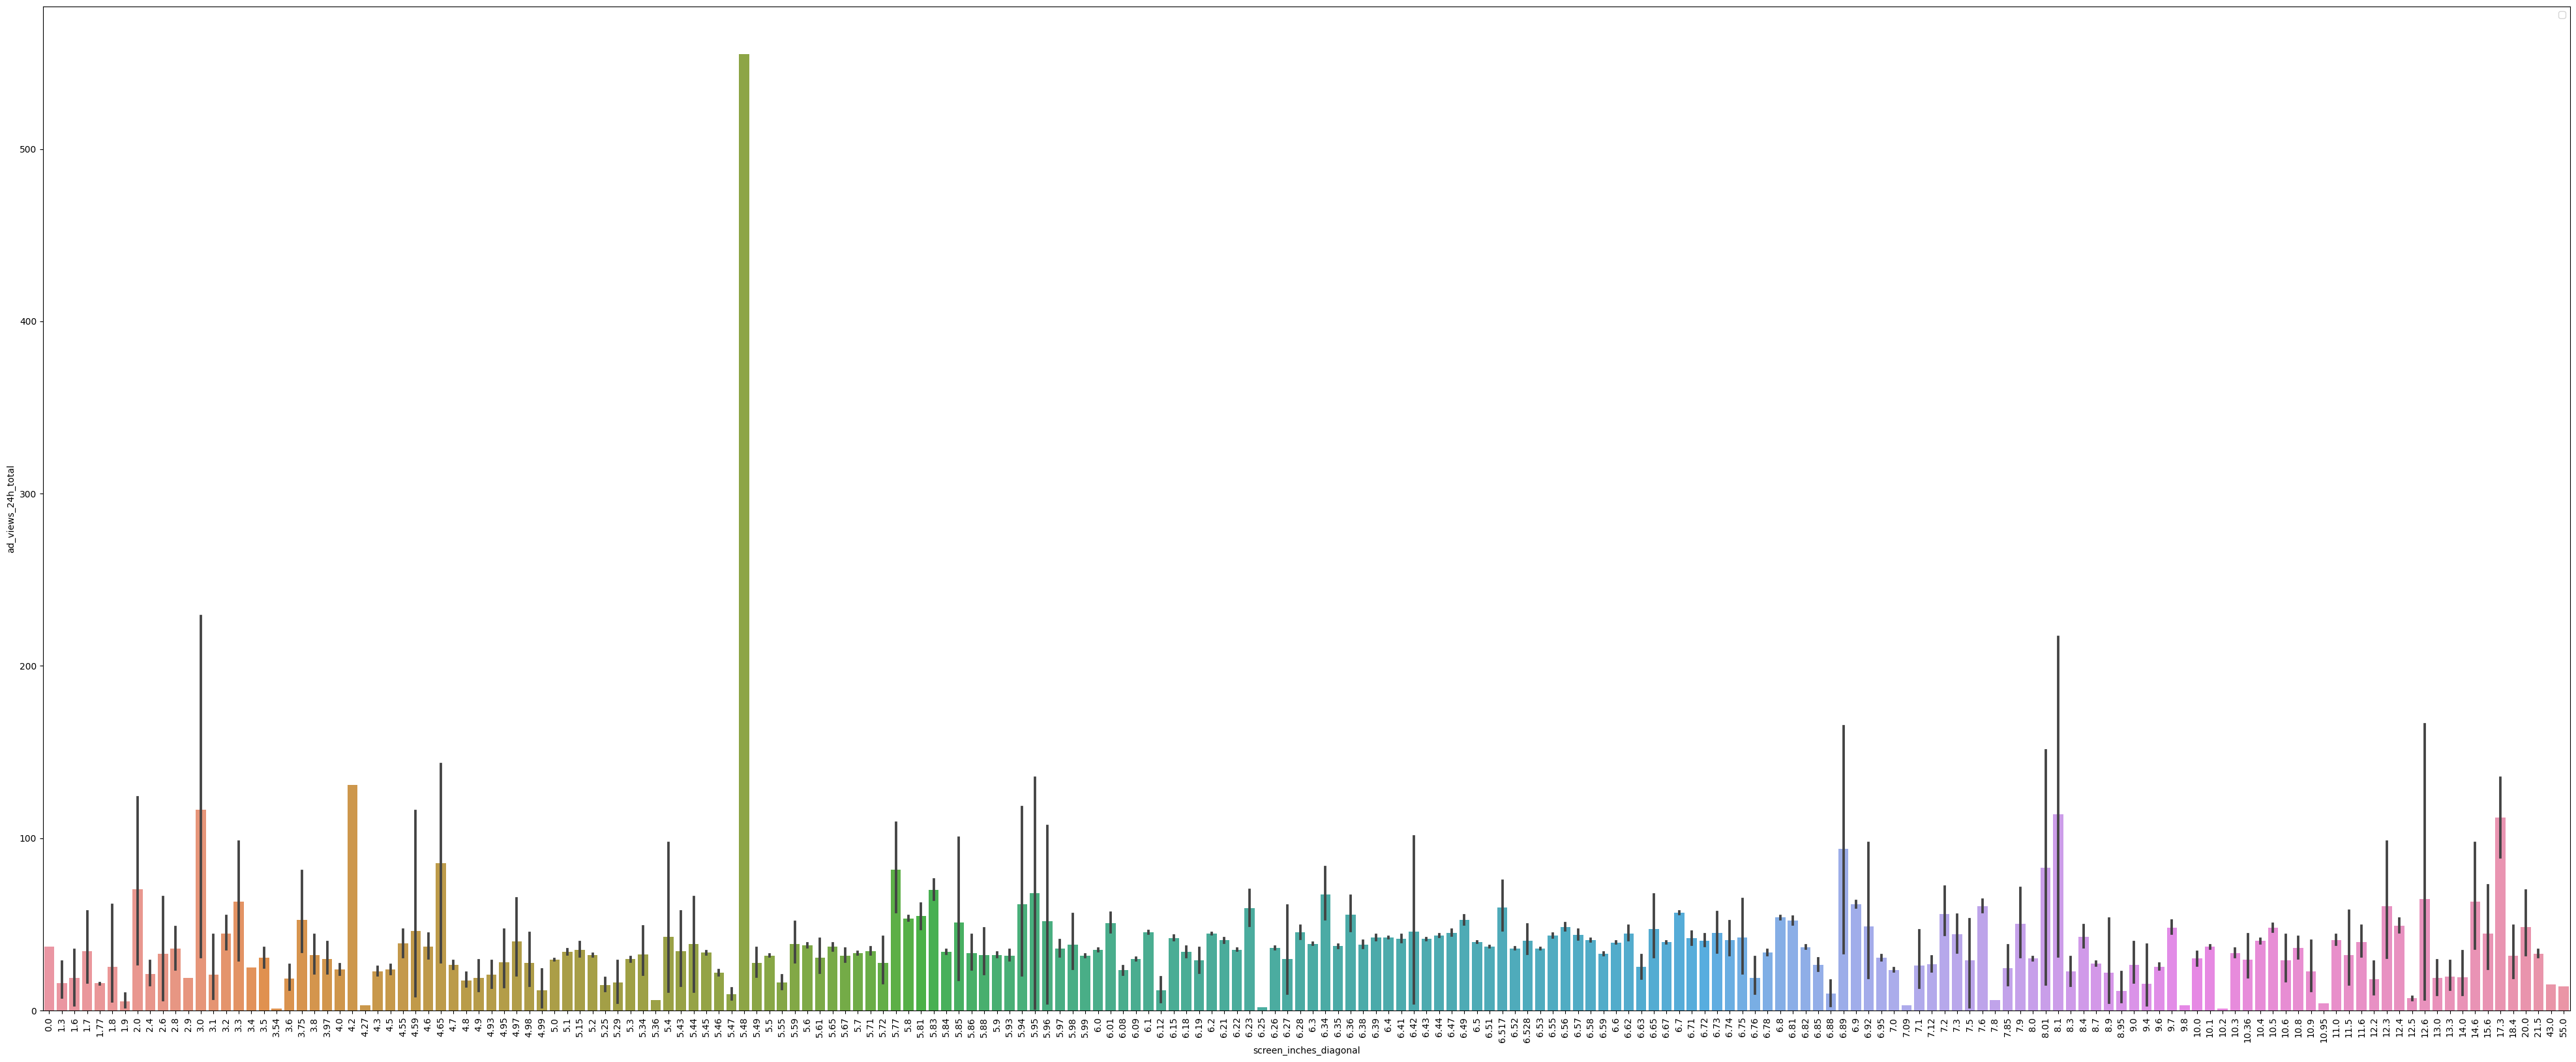

In [42]:
plt.figure(figsize=(50,20))
barWidth = 0.25
result = target_df.groupby(["screen_inches_diagonal"])['ad_views_24h_total'].mean().reset_index().sort_values('screen_inches_diagonal')
sns.barplot(x='screen_inches_diagonal', y="ad_views_24h_total", data=target_df, order=result['screen_inches_diagonal'])
plt.xticks(rotation=90)
plt.legend()

На данных гисторгаммах также можно наблюдать общее количество просмотров рекламы за 24 часа в зависимости от площади экрана и диагонали. Как и в случае выше, имеются заметные пики, причем разные для площади экрана и диагонали

(array([0, 1, 2]),
 [Text(0, 0, 'percent_revenue_24h_banner'),
  Text(1, 0, 'percent_revenue_24h_inters'),
  Text(2, 0, 'percent_revenue_24h_rewards')])

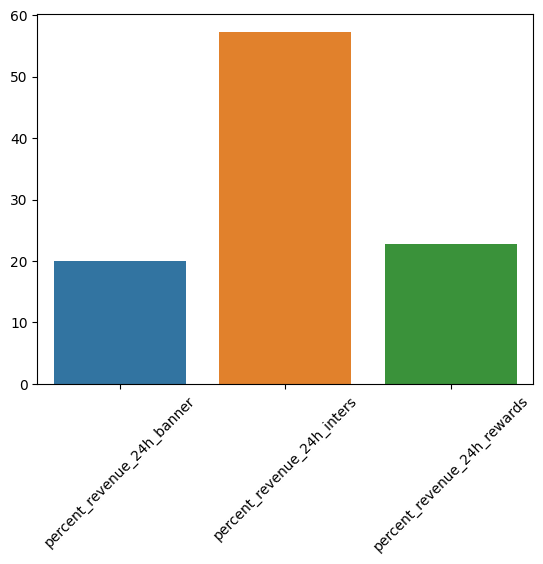

In [43]:
target_df = target_df.assign(percent_revenue_24h_banner= (target_df['revenue_24h_banner'] / target_df['revenue_24h_total']) * 100)
target_df = target_df.assign(percent_revenue_24h_inters= (target_df['revenue_24h_inters'] / target_df['revenue_24h_total']) * 100)
target_df = target_df.assign(percent_revenue_24h_rewards= (target_df['revenue_24h_rewards'] / target_df['revenue_24h_total']) * 100)

x_labels = ['percent_revenue_24h_banner', 'percent_revenue_24h_inters', 'percent_revenue_24h_rewards']
y_labels = [target_df['percent_revenue_24h_banner'].mean(), target_df['percent_revenue_24h_inters'].mean(), target_df['percent_revenue_24h_rewards'].mean()]
sns.barplot(x=x_labels, y=y_labels)
plt.xticks(rotation=45)

Доли revenue от revenue_total за 24 часа

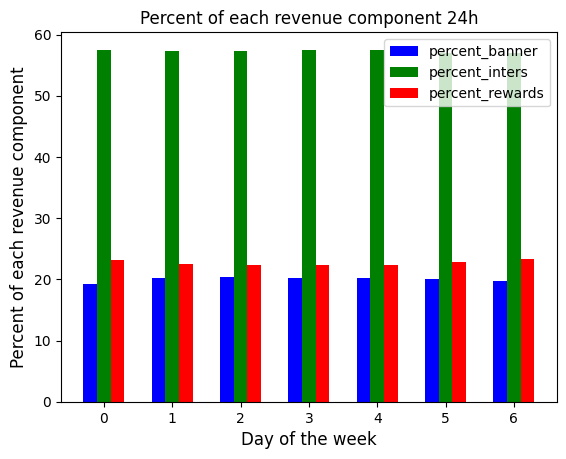

In [44]:
ax = plt.subplot(111)
w = 0.2
ax.bar(target_df['dayofweek'].unique()-w, target_df.groupby('dayofweek')['percent_revenue_24h_banner'].mean(), width=0.2, color='b', align='center', label='percent_banner')
ax.bar(target_df['dayofweek'].unique(), target_df.groupby('dayofweek')['percent_revenue_24h_inters'].mean(), width=0.2, color='g', align='center', label='percent_inters')
ax.bar(target_df['dayofweek'].unique()+w, target_df.groupby('dayofweek')['percent_revenue_24h_rewards'].mean(), width=0.2, color='r', align='center', label='percent_rewards')
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Percent of each revenue component', fontsize=12)
plt.title('Percent of each revenue component 24h')
plt.legend()

Доли revenue не имеют различий в среднем по дням недели

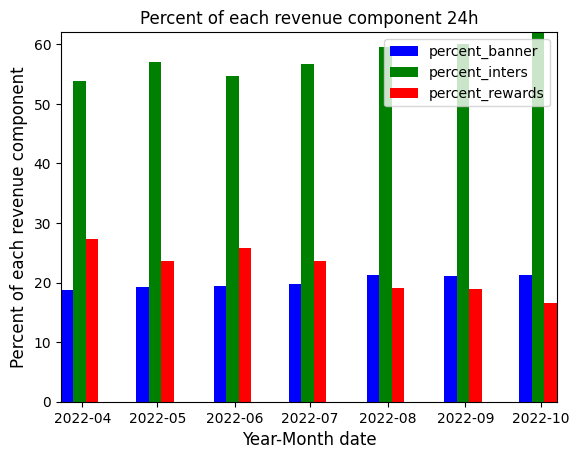

In [45]:
from matplotlib.dates import date2num
ax = plt.subplot(111)
x = date2num(target_df['install_month_year'].unique())
df_temp = target_df.assign(date2num=date2num(target_df['install_month_year']))
w = 5
ax.bar(x-w, df_temp.groupby('date2num')['percent_revenue_24h_banner'].mean(), width=w, color='b', align='center', label='percent_banner')
ax.bar(x, df_temp.groupby('date2num')['percent_revenue_24h_inters'].mean(), width=w, color='g', align='center', label='percent_inters')
ax.bar(x+w, df_temp.groupby('date2num')['percent_revenue_24h_rewards'].mean(), width=w, color='r', align='center', label='percent_rewards')
ax.xaxis_date()
ax.autoscale(tight=True)
plt.xlabel('Year-Month date', fontsize=12)
plt.ylabel('Percent of each revenue component', fontsize=12)
plt.title('Percent of each revenue component 24h')
plt.legend()

Можно заметить слабую тенденцию уменьшения дохода за рекламу показанную во время игровых событий

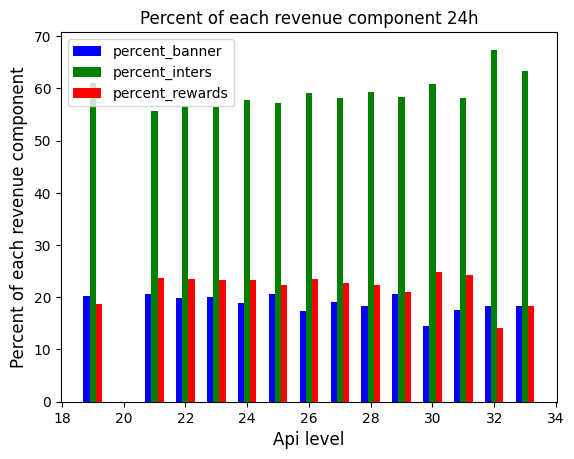

In [46]:
ax = plt.subplot(111)
w = 0.2
s = target_df['api_level'].fillna(df['api_level'].value_counts().idxmin()).unique()
ax.bar(s-w, target_df.groupby('api_level')['percent_revenue_24h_banner'].mean(), width=0.2, color='b', align='center', label='percent_banner')
ax.bar(s, target_df.groupby('api_level')['percent_revenue_24h_inters'].mean(), width=0.2, color='g', align='center', label='percent_inters')
ax.bar(s+w, target_df.groupby('api_level')['percent_revenue_24h_rewards'].mean(), width=0.2, color='r', align='center', label='percent_rewards')
plt.xlabel('Api level', fontsize=12)
plt.ylabel('Percent of each revenue component', fontsize=12)
plt.title('Percent of each revenue component 24h')
plt.legend()

Также имеются различия распределения revenue для различных версий операционных систем. Можно оставить доли как признак.

C:\Users\ru-lo\AppData\Local\Temp\ipykernel_2292\3342803822.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr.corr()


<Axes: >

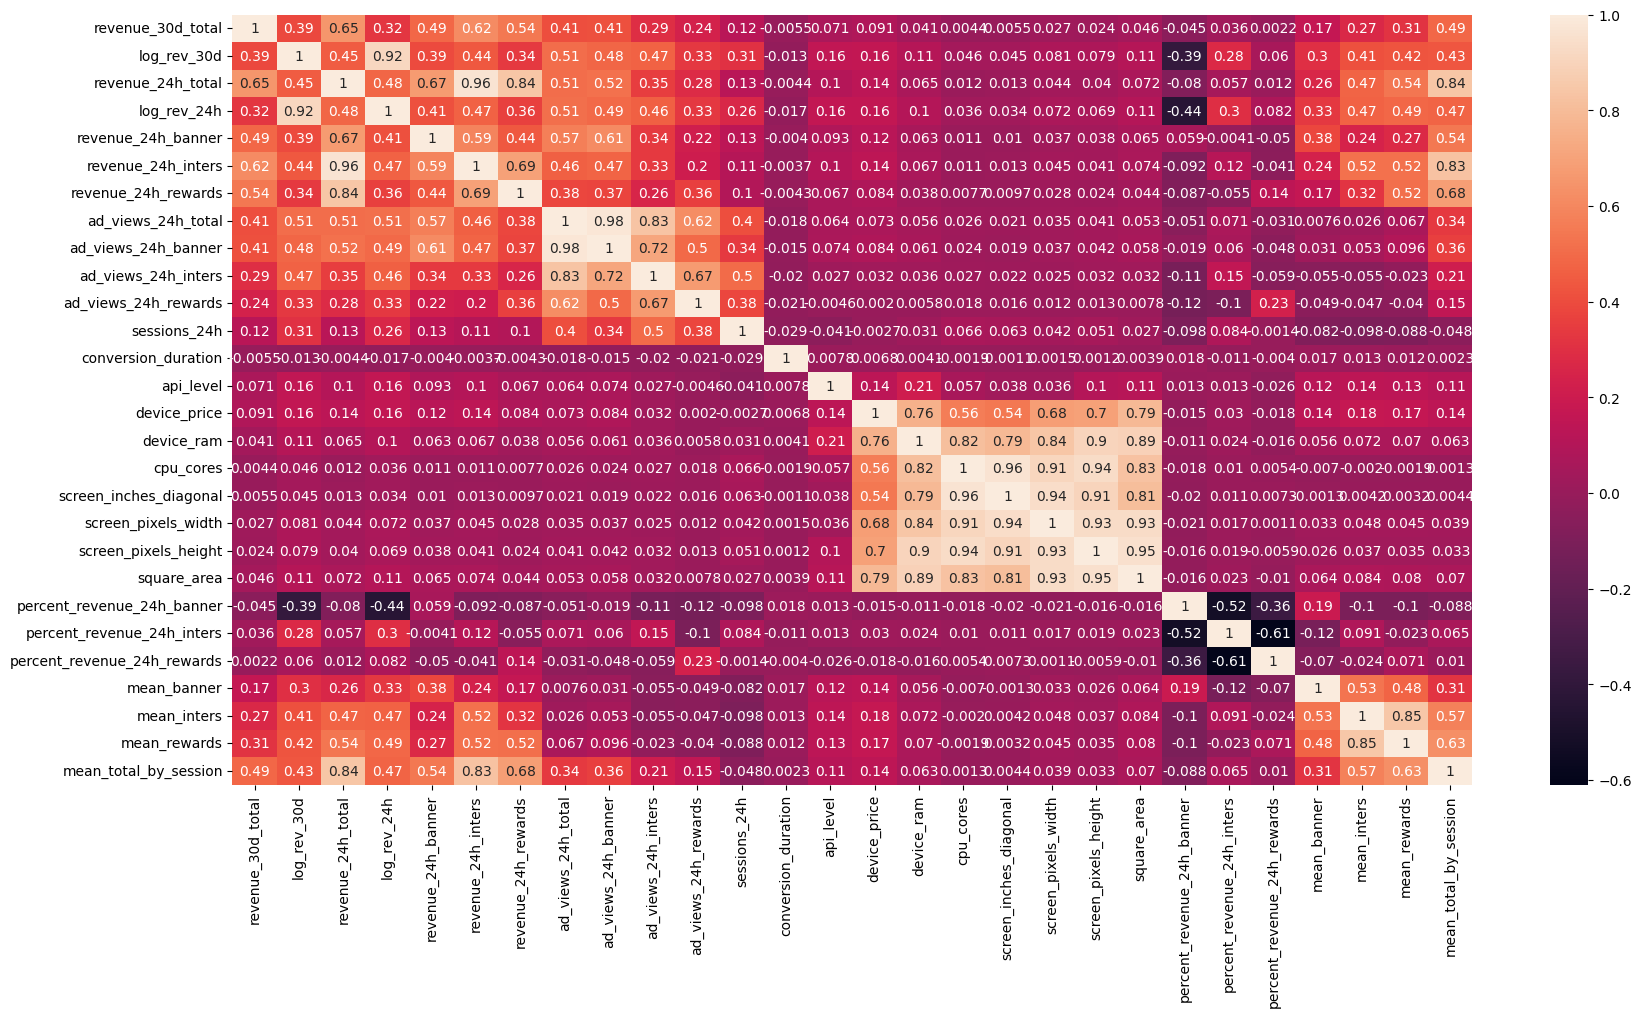

In [47]:
corr = target_df[['revenue_30d_total', 'log_rev_30d', 'revenue_24h_total', 'log_rev_24h', 'revenue_24h_banner', 'revenue_24h_inters', 'revenue_24h_rewards', 'ad_views_24h_total', 'ad_views_24h_banner', 'ad_views_24h_inters',
'ad_views_24h_rewards', 'sessions_24h', 'conversion_duration',
'language', 'api_level', 'device_price', 'device_ram', 'cpu_cores',
'screen_inches_diagonal', 'screen_pixels_width', 'screen_pixels_height',
'install_month_year', 'square_area', 'percent_revenue_24h_banner',
'percent_revenue_24h_inters', 'percent_revenue_24h_rewards']]
corr = corr.assign(mean_banner=corr['revenue_24h_banner'] / corr['ad_views_24h_banner'])
corr = corr.assign(mean_inters=corr['revenue_24h_inters'] / corr['ad_views_24h_inters'])
corr = corr.assign(mean_rewards=corr['revenue_24h_rewards'] / corr['ad_views_24h_rewards'])
corr = corr.assign(mean_total_by_session=corr['revenue_24h_total'] / corr['sessions_24h'])
corr['conversion_duration'] = corr['conversion_duration'].replace(0, corr['conversion_duration'].loc[corr['conversion_duration'] > 0].mean())
corr = corr.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot=True)

По матрице корреляции видна корреляция целевой переменной с revenue за 24 часа, количеством просмотренных реклам, а также с техническими показателями девайса и с долей доходов от revenue 24h. В целом вышеизложенный анализ согласуется с данными показателями

### Вывод

Исходя из вышеизложенного анализа данных можно взять в качестве входных признаков:

- install_date в чистом виде, на гистограмме было видно значительное различие среднего revenue От даты. (проявляется в основном по дням на месячном промежутке сильных различий не видно, но можно покопать туда, пока оставляем)
- random_user_id, user_agent, country_code, ua_network_name будут удалены, там нет информативных данных
- добавляем логарифмический вариант переменной revenue_24h_total (регрессионный бейзлайн неплохо сработал)
- Оставляем все остальные признаки, NaN значения у категориальных признаков заполним наиболее редко встречающимися, NaN в количественных признаках заполним средним значением.
- Добавим производные признаки: составляющие доли от revenue_24h_total и средние значения по revenue за 24 часа (по сессиям(сколько в среднем человек приносит дохода за сессию)).

#### Предположение:
- В выборке нет айфонов либо их доля пренебрежимо мала

#### Further works:
- В дальнейшем бы хотелось сделать отдельную модель для предсказания нулевого дохода от пользователя или же предсказание отсутствия прироста после первого дня
- Дальше копать в сторону зависимости активности пользователя от дня недели
- Запросить данные по событиям (ивентам в игре, скиндки, какие рекламы показываются и т.д.)

Ниже приведены попытки с наскока вытащить информацию из user_agent, однако ничего толкового эта информация не показала. Возможно можно сильнее там покапаться но в рамках поставленных сроков эти попытки были оставлены на потом

In [49]:
target_df['user_agent'] = target_df['user_agent'].dropna().astype(str)

In [50]:
target_df['user_agent'] = target_df['user_agent'].fillna('')
target_df['user_agent'] = target_df['user_agent'].str.replace('(', ';', regex=True)
target_df['user_agent'] = target_df['user_agent'].str.replace(')', '', regex=True)
target_df['user_agent'] = target_df['user_agent'].str.replace('Build/', ';', regex=True)
target_df[['vm_type', 'vm_version', 'os', 'os_char', 'os_type', 'model', 'build']] = target_df['user_agent'].str.split(';', expand=True)[[0, 1, 2, 3, 4, 5, 6]]
target_df[['user_agent', 'vm_type', 'vm_version', 'os', 'os_char', 'os_type', 'model', 'build']] = target_df[['user_agent', 'vm_type', 'vm_version', 'os', 'os_char', 'os_type', 'model', 'build']].apply(lambda y: np.nan if len(y)==0 else y)

In [51]:
target_df['user_agent'] = target_df['user_agent'].apply(lambda y: np.nan if len(y)==0 else y)

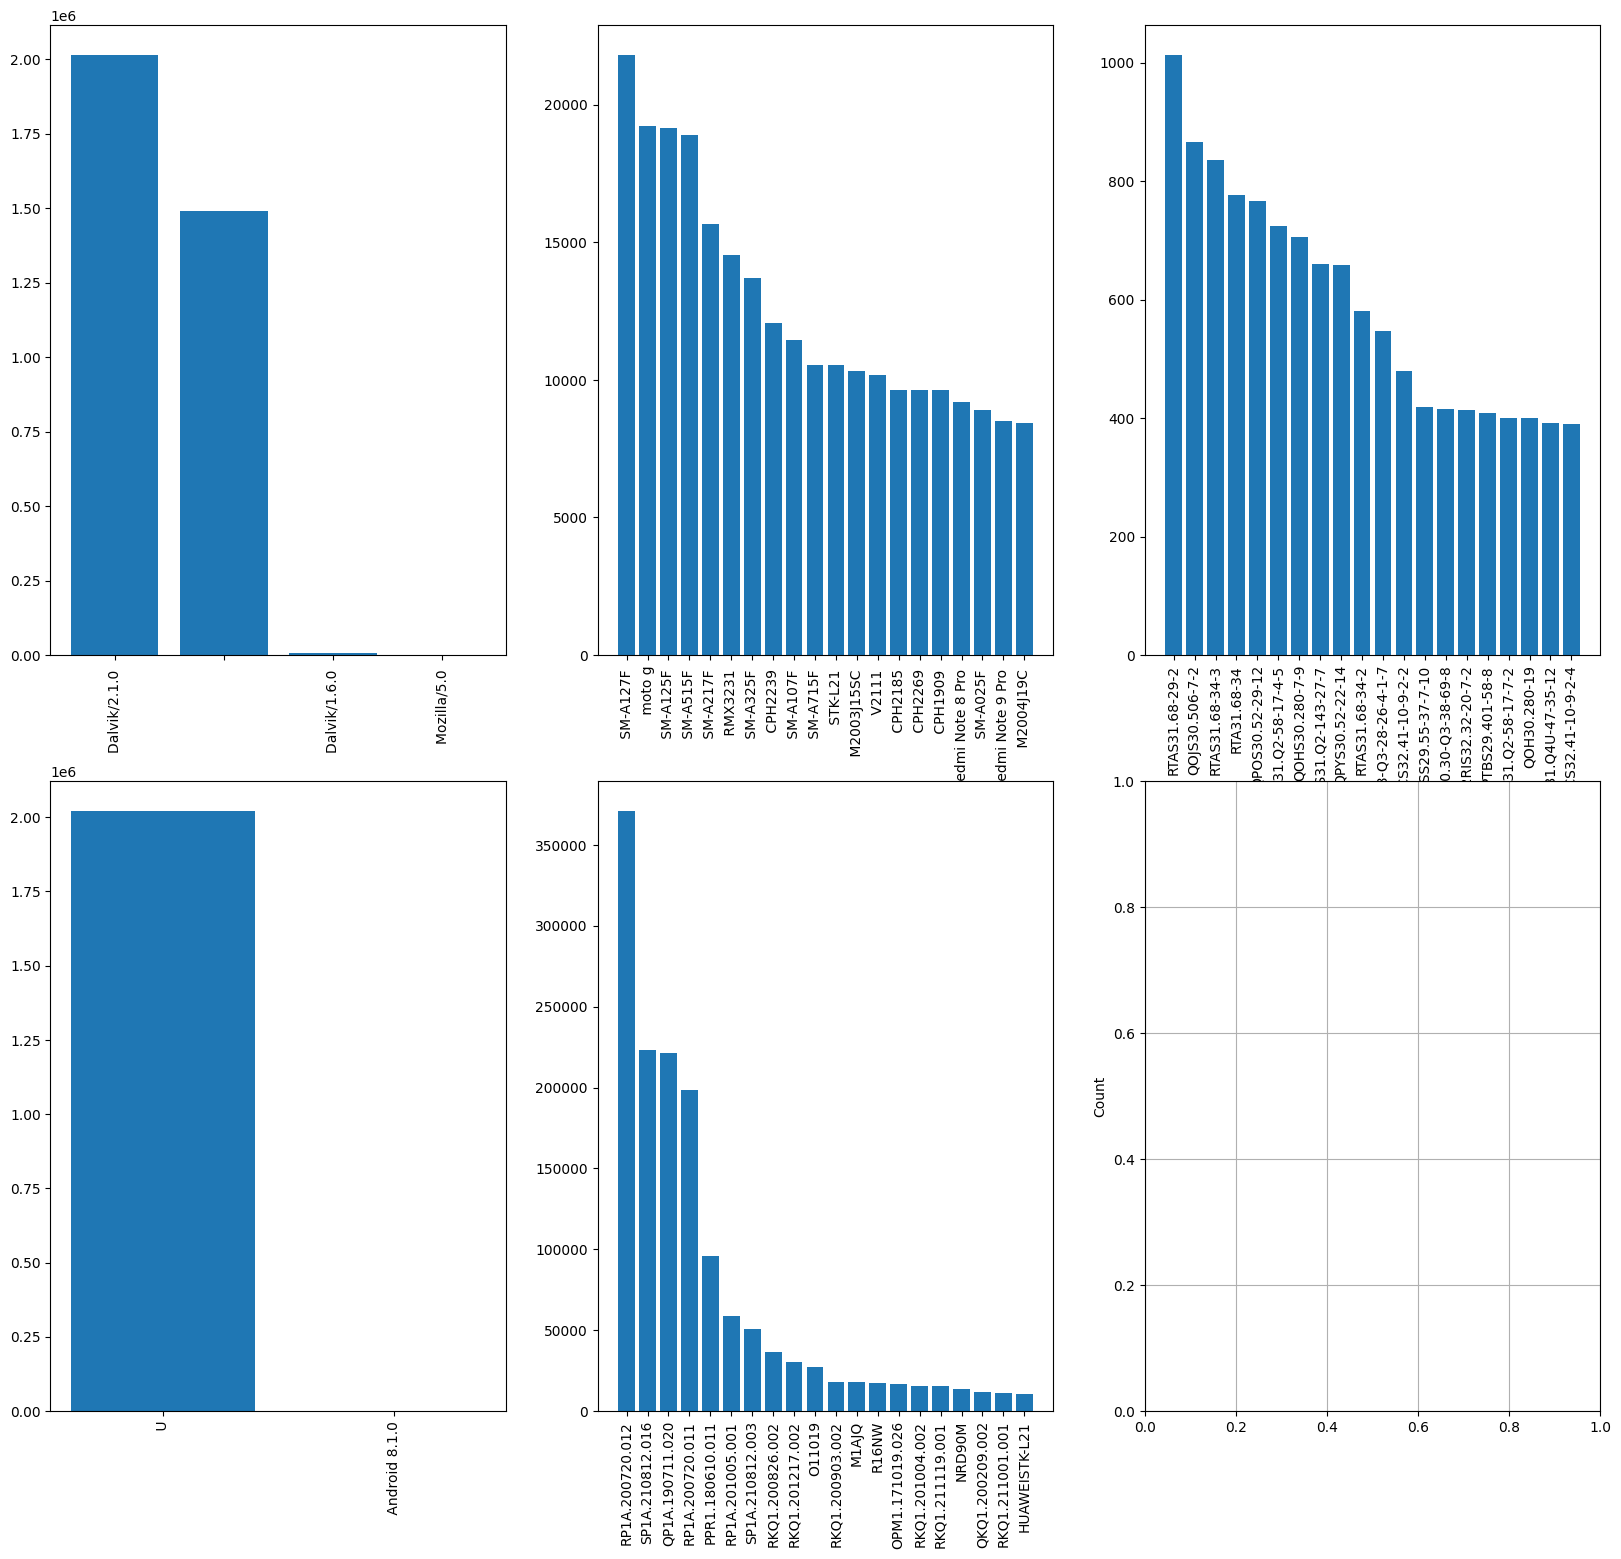

In [52]:
fig, ax = plt.subplots(2, 3, figsize=(20, 18))
i = 0
j = 0
for num, column in enumerate(['vm_type', 'os', 'os_type', 'model', 'build']):
    levels = target_df[column].value_counts().head(20)
    i = num % 2
    j = num // 2
    ax[i, j].bar(levels.index, levels.values)
    ax[i, j].set_xticks(ax[i, j].get_xticks(), ax[i, j].get_xticklabels(), rotation=90)

plt.ylabel('Count')
plt.grid()
plt.show()

In [53]:
df['user_agent'] = df['user_agent'].str.lower()
df[df['user_agent'].str.contains('apple', na=False) == True]

,random_user_id,install_date,ua_network_name,country_code,user_agent,revenue_30d_total,revenue_24h_total,revenue_24h_banner,revenue_24h_inters,revenue_24h_rewards,...,sessions_24h,conversion_duration,language,api_level,device_price,device_ram,cpu_cores,screen_inches_diagonal,screen_pixels_width,screen_pixels_height
2819,6d831262c35f48e9a256efc7bfda4c9993119388,2022-03-01,UA,NaN,mozilla/5.0 (linux; android 8.1.0; 5033d_ru bu...,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,2144,ru,27.0,50,1024,4,5.0,480,960
3625,8ab088e5a13e0ef9de4980dd8a0c8f0547d4cc2e,2022-03-01,UA,NaN,mozilla/5.0 (linux; android 8.1.0; 5033e build...,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,es,27.0,50,1024,4,5.0,480,960
9360,21d0be53dc4141ae2c11adda2dbe245988941b22,2022-03-01,UA,NaN,mozilla/5.0 (linux; android 8.1.0; 5033m build...,0.009347,0.009347,0.001473,0.007874,0.000000,...,2,0,en,27.0,0,1024,4,5.0,480,960
15920,3966eb7b210d7f0f917f562514d2d0bc1f1e54e4,2022-03-01,UA,NaN,mozilla/5.0 (linux; android 8.1.0; 5033f_eea b...,0.028229,0.028229,0.001073,0.024063,0.003093,...,2,0,hu,27.0,0,1024,4,5.0,480,960
17817,1e07935aa2cc180e05f013816ec5ea43f91dd5ba,2022-03-01,UA,NaN,mozilla/5.0 (linux; android 8.1.0; 5033e build...,0.402447,0.125127,0.011084,0.085484,0.028559,...,6,0,es,27.0,50,1024,4,5.0,480,960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935748,b1f777623a38bfaa202d9185271643a1a2752c15,2022-09-18,UA,NaN,mozilla/5.0 (linux; u; android 6.0; ru-ru; 508...,0.031814,0.028814,0.014329,0.012142,0.002342,...,2,0,ru,23.0,200,2048,4,5.0,720,1280
3977742,cde0387b002491e1869a70a91f7fcbb8bd4613f1,2022-09-21,UA,NaN,mozilla/5.0 (linux; u; android 6.0; tr-tr; 707...,0.023754,0.017916,0.001405,0.011272,0.005239,...,5,0,tr,23.0,0,2048,8,6.0,1080,1920
4006420,d4e9109bb415b73804ea9cfaeb9f03721081d1d5,2022-09-23,UA,NaN,mozilla/5.0 (linux; u; android 6.0; ru-ru; 508...,0.002243,0.002243,0.000000,0.002243,0.000000,...,1,0,ru,23.0,200,2048,4,5.0,720,1280
4013533,2b25781ed18df327498161c25d55a9436c1ca650,2022-09-24,UA,NaN,mozilla/5.0 (linux; u; android 6.0; tr-tr; 707...,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,tr,23.0,0,2048,8,6.0,1080,1920
